In [1]:
# Predict house price using regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('housePrices.csv')

In [4]:
data.shape

(21613, 21)

In [5]:
data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21102,2867300190,20140528T000000,363000.0,4,2.50,3753,7204,2.0,0,0,...,10,3336,417,2008,0,98023,47.3011,-122.385,3494,9375
19114,339350150,20150311T000000,675000.0,3,2.75,2740,5735,2.0,0,0,...,9,2740,0,2004,0,98052,47.6862,-122.093,2210,5026
12637,5249804655,20141017T000000,800000.0,4,2.25,2010,7200,1.0,0,1,...,8,1010,1000,1950,0,98118,47.5591,-122.267,2010,7200
4276,8731730590,20150513T000000,242150.0,4,1.75,1490,8544,1.0,0,0,...,7,1490,0,1970,0,98031,47.3894,-122.166,1180,8372
4225,9477001270,20150316T000000,390000.0,3,1.75,1300,10030,1.0,0,0,...,7,1300,0,1967,0,98034,47.7359,-122.192,1520,7713


# Data Description:

date: The date on which the property sale was recorded.

price: The price at which the property was sold.

bedrooms: The number of bedrooms in the property.

bathrooms: The number of bathrooms in the property.

sqft_living: The total interior living space of the property in square feet.

sqft_lot: The total lot size of the property in square feet.

floors: The number of floors (levels) in the property.

waterfront: Whether the property has a waterfront view or not (typically a binary indicator).

view: An index from 0 to 4 of how good the view of the property is.

condition: An index from 1 to 5 on the condition of the property.

grade: An index from 1 to 13, where higher grades generally indicate better construction quality and design.

sqft_above: The square footage of the interior living space that is above ground level.

sqft_basement: The square footage of the interior living space that is in the basement.

yr_built: The year the property was built.

zipcode: The zipcode area where the property is located.

lat: The latitude of the property location.

long: The longitude of the property location.

sqft_living15: The average size of interior housing living space for the nearest 15 neighbors.

sqft_lot15: The average size of the land lots of the nearest 15 neighbors.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
data.drop('id',axis=1,inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data['date'].duplicated().sum()

21241

In [11]:
#date:
data['date'].value_counts().sum()

21613

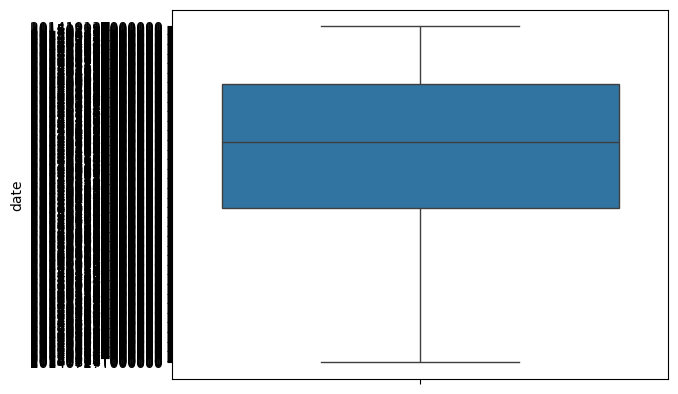

In [12]:
sns.boxplot(data['date'])
plt.show()

In [13]:
# price
data['price'].value_counts().sum()

21613

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\3077017462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


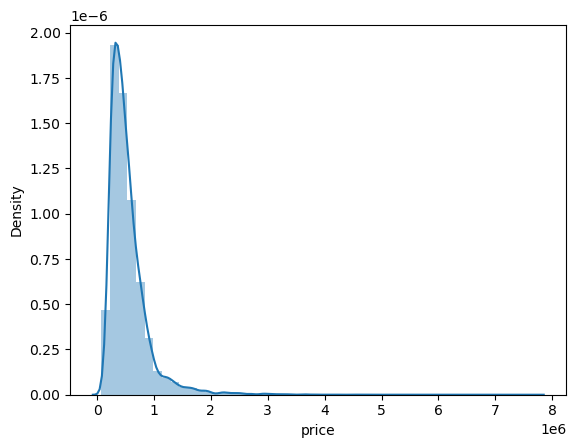

In [14]:
sns.distplot(data['price'])
plt.show()

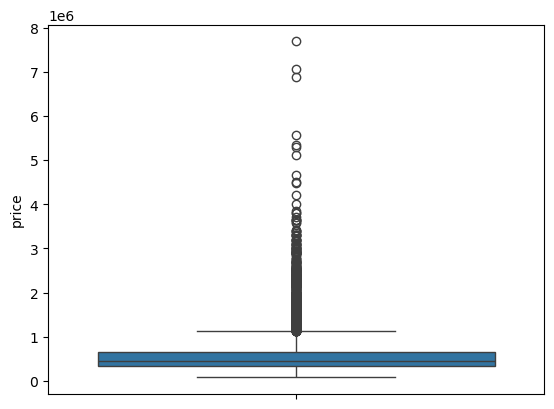

In [15]:
sns.boxplot(data['price'])
plt.show()

In [16]:
# bedrooms
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [17]:
data['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\2456709495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bedrooms'])


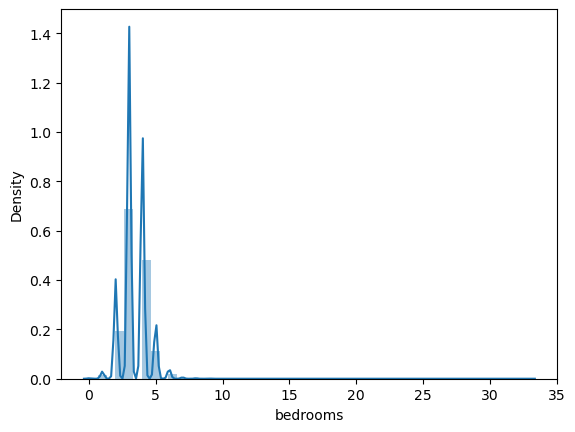

In [18]:
sns.distplot(data['bedrooms'])
plt.show()

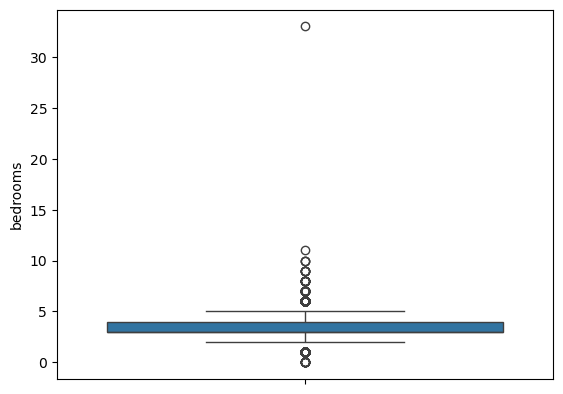

In [19]:
sns.boxplot(data['bedrooms'])
plt.show()

In [20]:
# bathrooms
data['bathrooms'].value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\2100510008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bathrooms'])


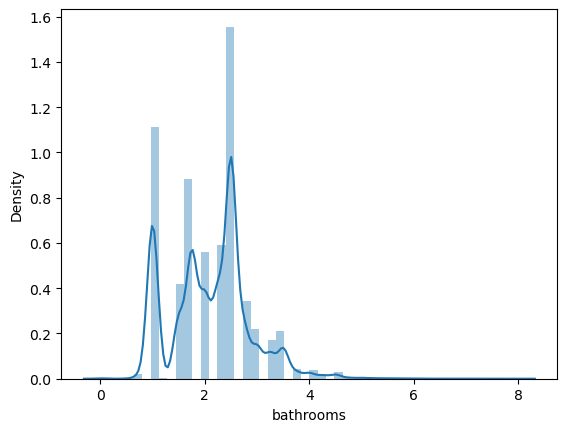

In [21]:
sns.distplot(data['bathrooms'])
plt.show()

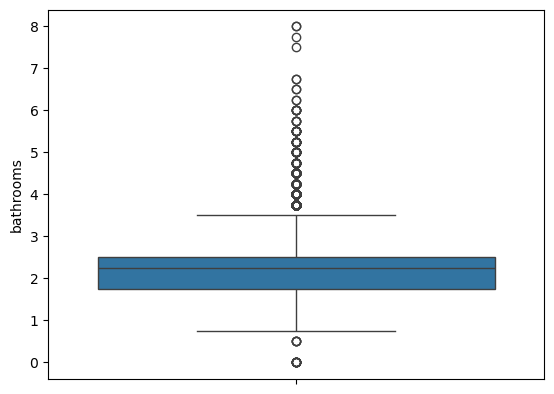

In [22]:
sns.boxplot(data['bathrooms'])
plt.show()

In [23]:
# sqft_living
data['sqft_living'].value_counts()

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: count, Length: 1038, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\1917492894.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sqft_living'])


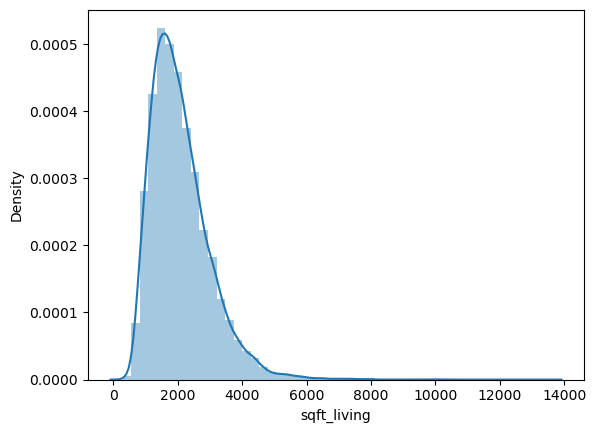

In [24]:
sns.distplot(data['sqft_living'])
plt.show()

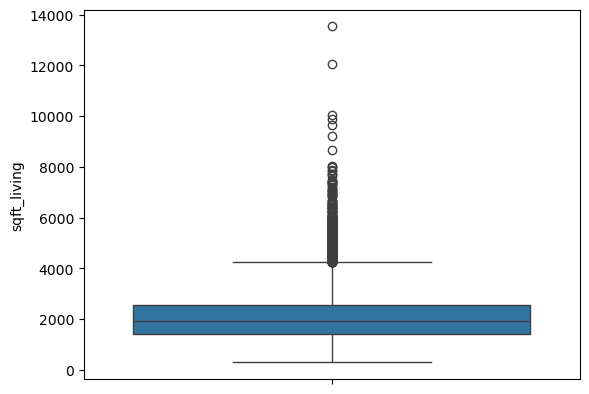

In [25]:
sns.boxplot(data['sqft_living'])
plt.show()

In [26]:
# sqft_lot
data['sqft_lot'].value_counts()

sqft_lot
5000     358
6000     290
4000     251
7200     220
4800     120
        ... 
25248      1
9934       1
9142       1
24330      1
1076       1
Name: count, Length: 9782, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\879135528.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sqft_lot'])


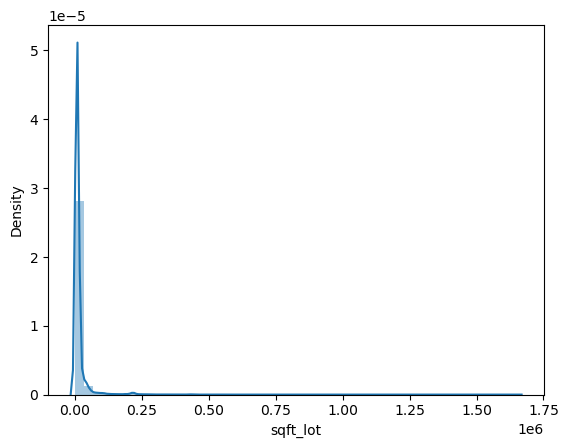

In [27]:
sns.distplot(data['sqft_lot'])
plt.show()

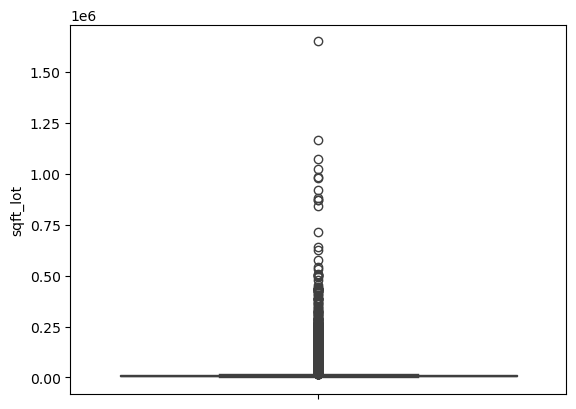

In [28]:
sns.boxplot(data['sqft_lot'])
plt.show()

In [29]:
# floors
data['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\2372492160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['floors'])


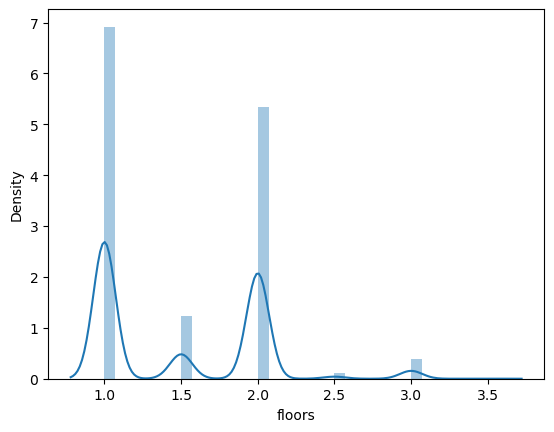

In [30]:
sns.distplot(data['floors'])
plt.show()

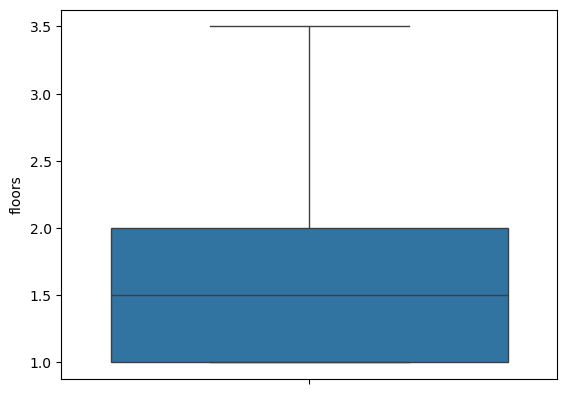

In [31]:
sns.boxplot(data['floors'])
plt.show()

In [32]:
#waterfront:
data['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

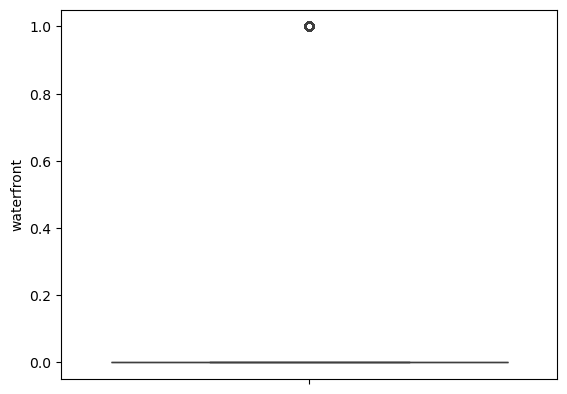

In [33]:
sns.boxplot(data['waterfront'])
plt.show()

In [34]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [35]:
# 'view':
data['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\4245063184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['view'])


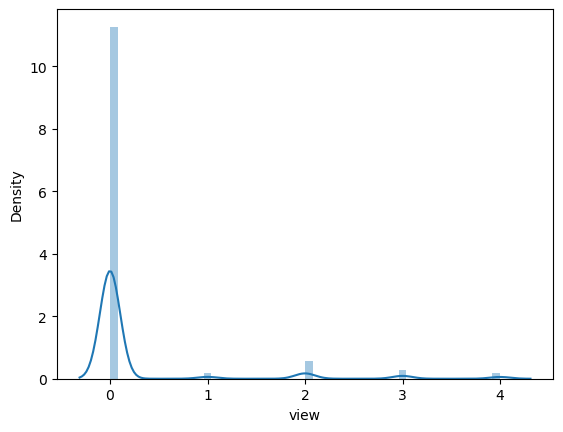

In [36]:
sns.distplot(data['view'])
plt.show()

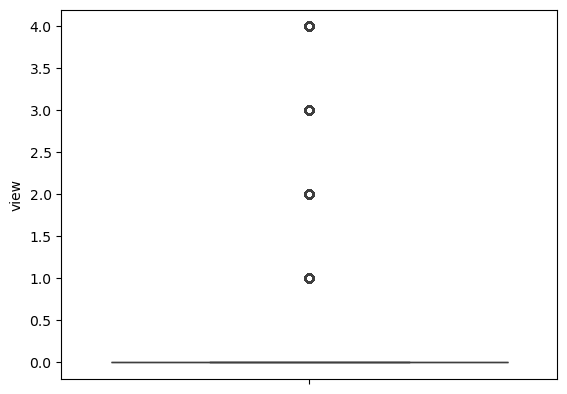

In [37]:
sns.boxplot(data['view'])
plt.show()

In [38]:
# 'condition'
data['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\73255542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['condition'])


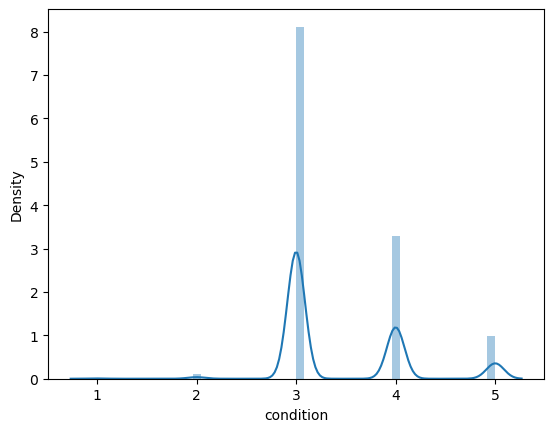

In [39]:
sns.distplot(data['condition'])
plt.show()

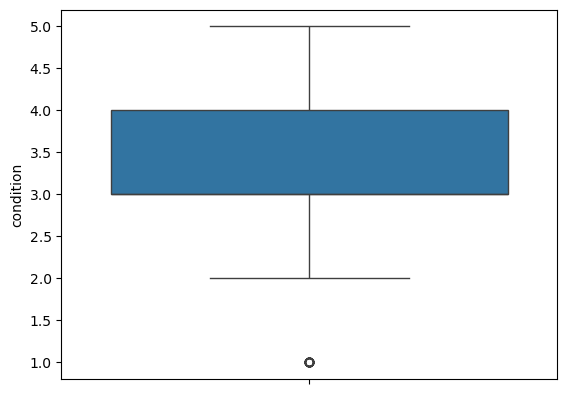

In [40]:
sns.boxplot(data['condition'])
plt.show() 

In [41]:
# 'grade'
data['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\373114022.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['grade'])


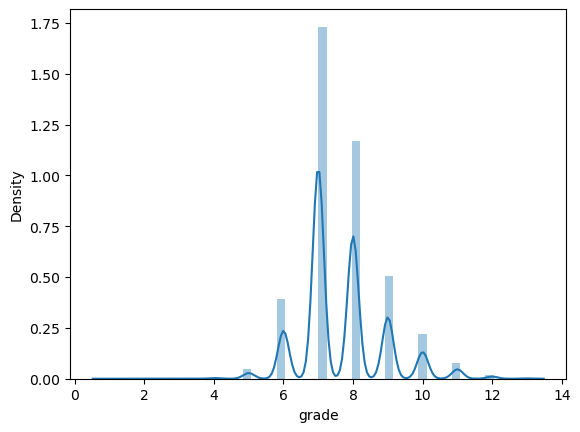

In [42]:
sns.distplot(data['grade'])
plt.show()

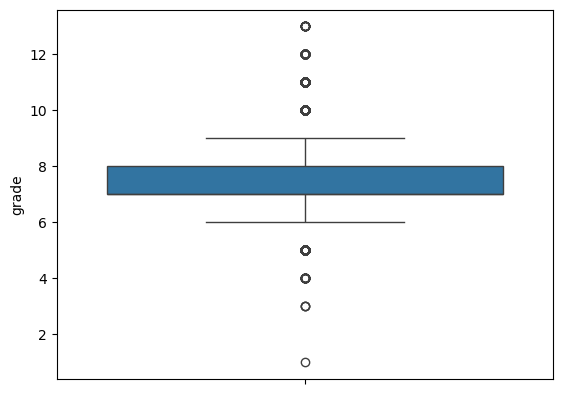

In [43]:
sns.boxplot(data['grade'])
plt.show()

In [44]:
# 'sqft_above'
data['sqft_above'].value_counts()

sqft_above
1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: count, Length: 946, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\1196308139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sqft_above'])


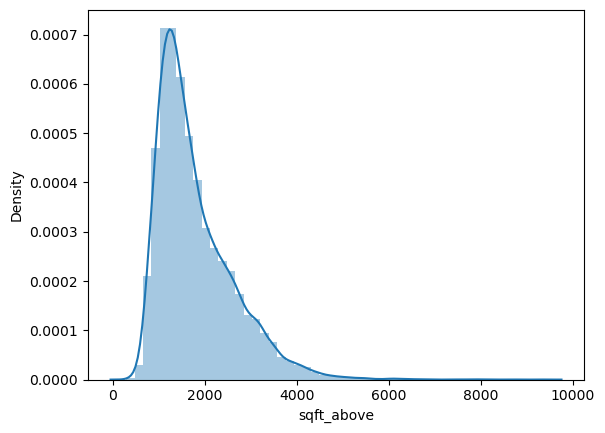

In [45]:
sns.distplot(data['sqft_above'])
plt.show()

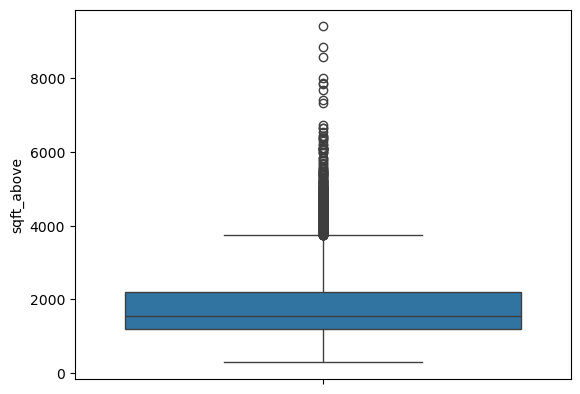

In [46]:
sns.boxplot(data['sqft_above'])
plt.show()

In [47]:
#'sqft_basement'
data['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\2821433036.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sqft_basement'])


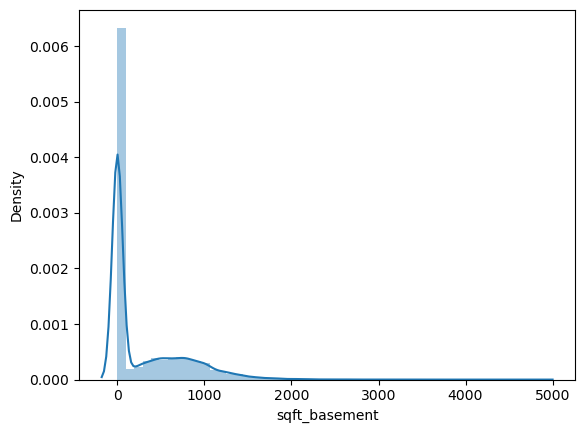

In [48]:
sns.distplot(data['sqft_basement'])
plt.show()

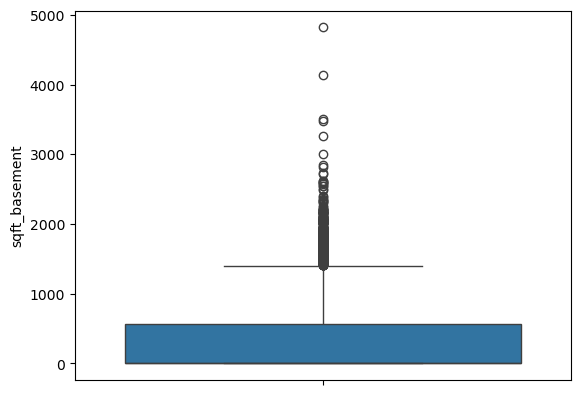

In [49]:
sns.boxplot(data['sqft_basement'])
plt.show()

In [50]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [51]:
# 'yr_built'
data['yr_built'].value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\932949514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['yr_built'])


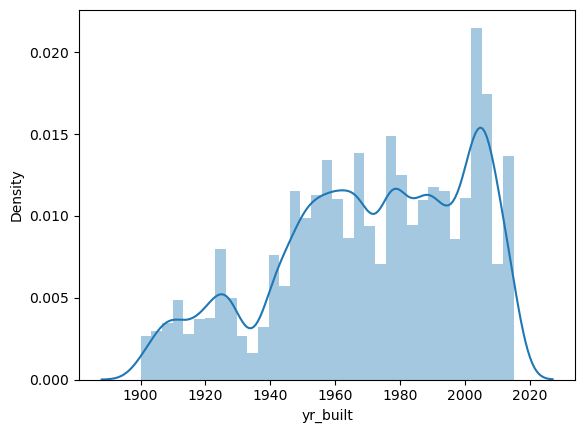

In [52]:
sns.distplot(data['yr_built'])
plt.show()

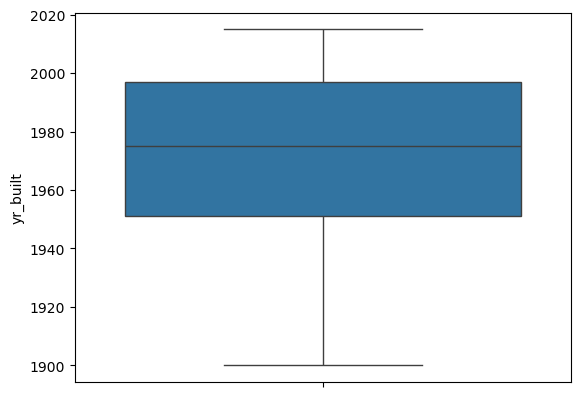

In [53]:
sns.boxplot(data['yr_built'])
plt.show()

In [54]:
#'yr_renovated'
data['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\2063342616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['yr_renovated'])


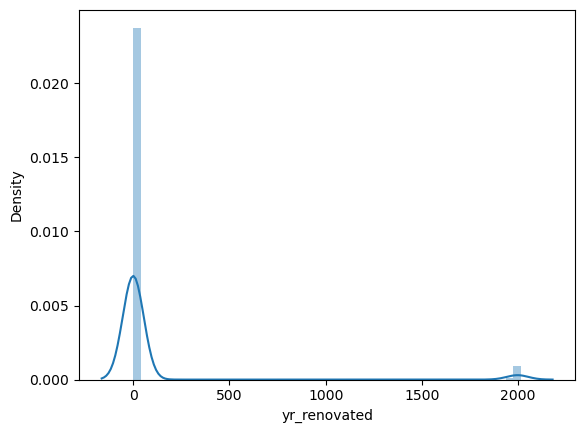

In [55]:
sns.distplot(data['yr_renovated'])
plt.show()

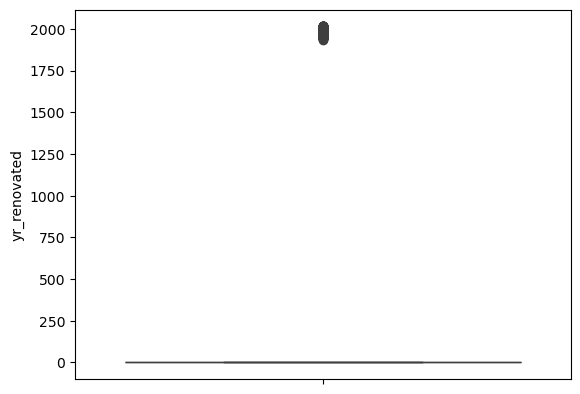

In [56]:
sns.boxplot(data['yr_renovated'])
plt.show()

In [57]:
#'zipcode'
data['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\1404177815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['zipcode'])


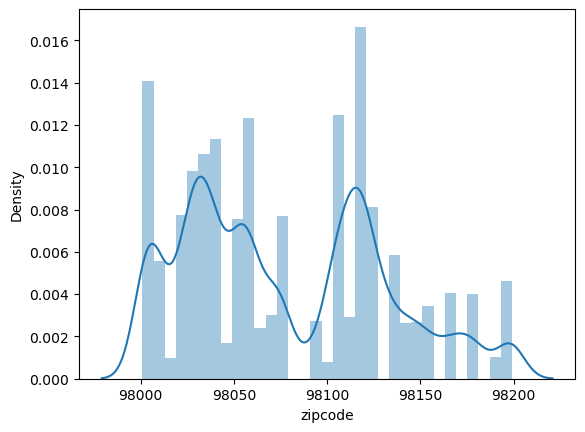

In [58]:
sns.distplot(data['zipcode'])
plt.show()

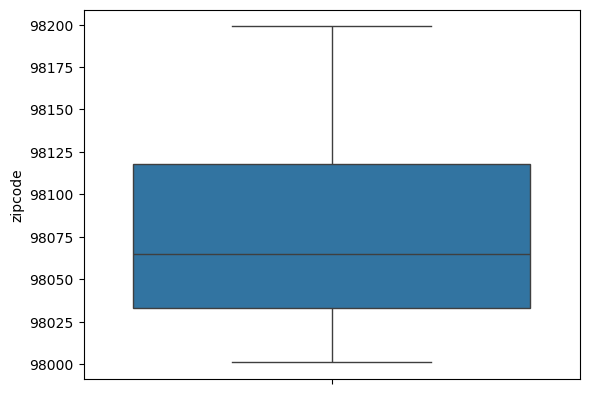

In [59]:
sns.boxplot(data['zipcode'])
plt.show()

In [60]:
#'lat'
data['lat'].value_counts()

lat
47.6624    17
47.5322    17
47.6846    17
47.5491    17
47.6955    16
           ..
47.6139     1
47.4184     1
47.4387     1
47.7526     1
47.6502     1
Name: count, Length: 5034, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\3548290250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['lat'])


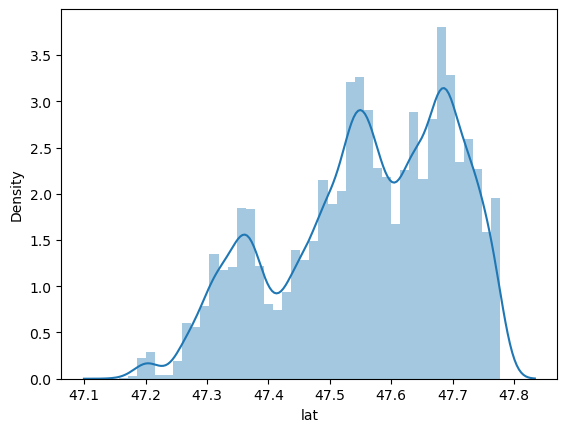

In [61]:
sns.distplot(data['lat'])
plt.show()

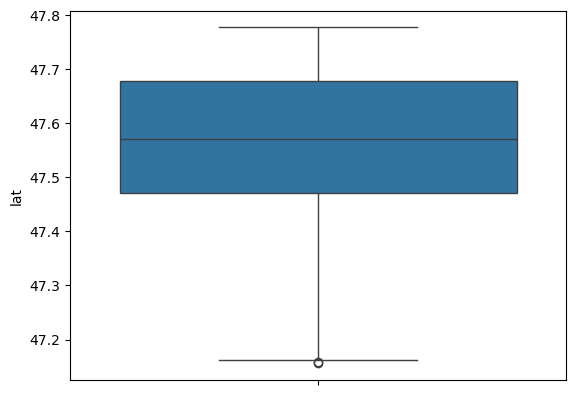

In [62]:
sns.boxplot(data['lat'])
plt.show()

In [63]:
#'long'
data['long'].value_counts()

long
-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.363     99
           ... 
-121.691      1
-122.514      1
-121.646      1
-122.515      1
-121.403      1
Name: count, Length: 752, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\1033733986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['long'])


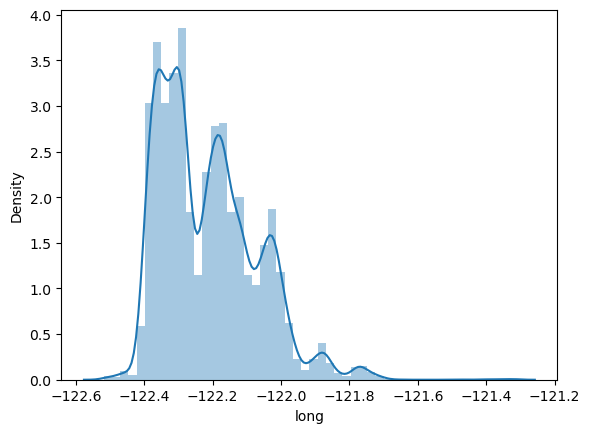

In [64]:
sns.distplot(data['long'])
plt.show()

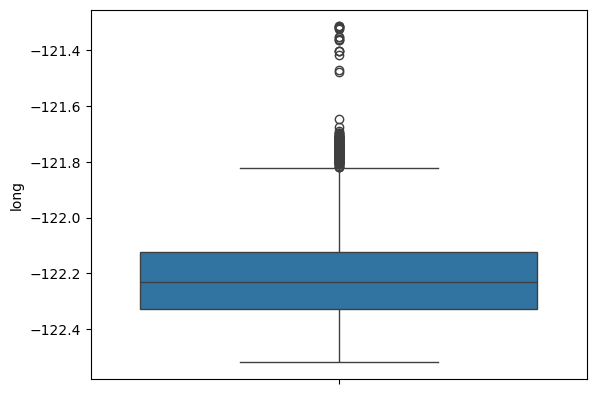

In [65]:
sns.boxplot(data['long'])
plt.show()

In [66]:
#'sqft_living15'
data['sqft_living15'].value_counts()

sqft_living15
1540    197
1440    195
1560    192
1500    181
1460    169
       ... 
2054      1
3736      1
4950      1
2728      1
2927      1
Name: count, Length: 777, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\1410717705.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sqft_living15'])


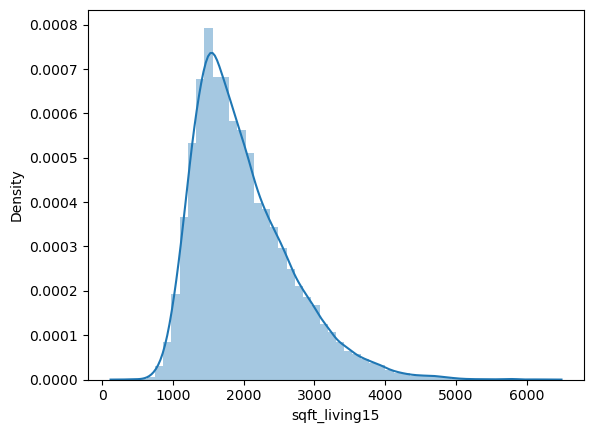

In [67]:
sns.distplot(data['sqft_living15'])
plt.show()

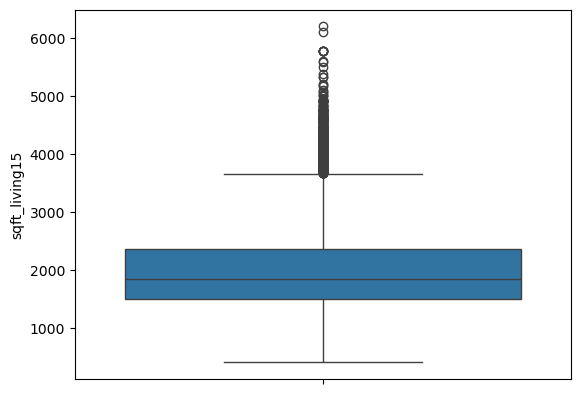

In [68]:
sns.boxplot(data['sqft_living15'])
plt.show()

In [69]:
#'sqft_lot15'
data['sqft_lot15'].value_counts()

sqft_lot15
5000     427
4000     357
6000     289
7200     211
4800     145
        ... 
25927      1
35943      1
5107       1
1514       1
2007       1
Name: count, Length: 8689, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10060\413856343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sqft_lot15'])


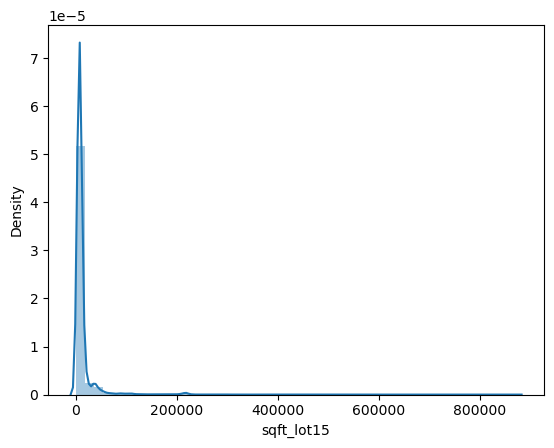

In [70]:
sns.distplot(data['sqft_lot15'])
plt.show()

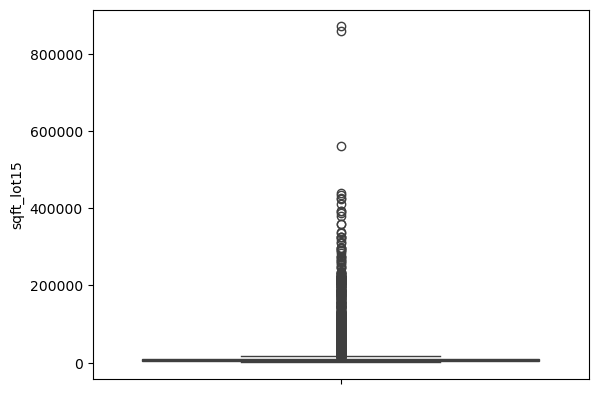

In [71]:
sns.boxplot(data['sqft_lot15'])
plt.show()

In [72]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Outlier Detection and Removal

Fields with Outliers: 
price,  bedrooms, bathrooms, sqft_livng, sqftlot, waterfront, view, grade, sqft_above, sqft_basement, yr_renovated, long, sqft_living15, sqft_lot15

In [73]:
columns_to_select = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                     'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
                     'yr_renovated', 'long', 'sqft_living15', 'sqft_lot15']
df_selected_columns = data.loc[:, columns_to_select] 


In [74]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [75]:
feature = df_selected_columns.columns
for i in feature:
    LL, UL = remove_outlier(df_selected_columns[i])
    df_selected_columns[i] = np.where(df_selected_columns[i] > UL, UL, df_selected_columns[i])
    df_selected_columns[i] = np.where(df_selected_columns[i] < LL, LL, df_selected_columns[i])

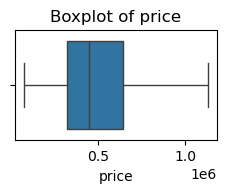

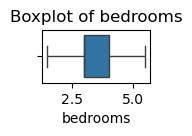

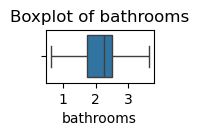

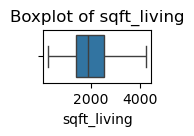

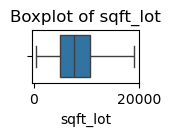

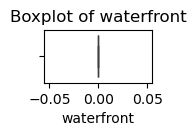

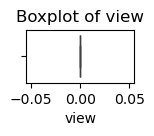

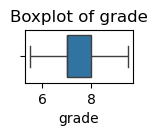

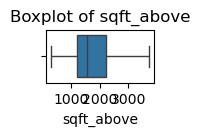

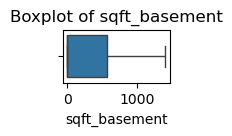

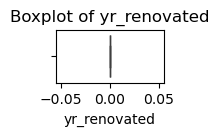

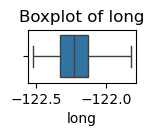

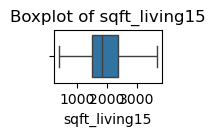

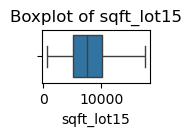

In [76]:
#outliers plotting:
plt.figure(figsize = (12,10))

for i in range(len(feature)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(x = df_selected_columns[feature[i]], data = df_selected_columns )
    plt.title('Boxplot of {}'.format(feature[i]))
    # plt.tight_layout()
    plt.show()

# Exploratory Data Analysis

In [77]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [78]:
#price & sqft_lot:
data.groupby(['zipcode','sqft_lot','price']).size()

zipcode  sqft_lot  price    
98001    2064      214100.0     1
         2231      214000.0     1
         3520      349950.0     1
         3680      329995.0     1
         3960      272000.0     1
                               ..
98199    15626     1810000.0    1
         18200     3200000.0    1
         21074     1337500.0    1
         23160     577000.0     1
         29111     1875000.0    1
Length: 21529, dtype: int64

In [79]:
data.groupby(['condition']).agg({'price':'min'})

,price
condition,
1,78000.0
2,80000.0
3,75000.0
4,89000.0
5,110000.0


In [80]:
data.groupby(['condition']).agg({'price':'max'})

,price
condition,
1,1500000.0
2,2555000.0
3,7062500.0
4,7700000.0
5,3650000.0


In [81]:
data.groupby(['condition']).agg({'price':'mean'})

,price
condition,
1,334431.666667
2,327287.145349
3,542012.578148
4,521200.390033
5,612418.089359


In [82]:
#Price and grade:
data.groupby(['grade']).agg({'price':'max'})

,price
grade,
1,142000.0
3,280000.0
4,435000.0
5,795000.0
6,1200000.0
7,2050000.0
8,3070000.0
9,2700000.0
10,3600000.0


In [83]:
data.groupby(['grade']).agg({'price':'min'})

,price
grade,
1,142000.0
3,75000.0
4,80000.0
5,78000.0
6,82000.0
7,90000.0
8,140000.0
9,230000.0
10,316000.0


In [84]:
data.groupby(['grade']).agg({'price':'mean'})

,price
grade,
1,1.420000e+05
3,2.056667e+05
4,2.143810e+05
5,2.485240e+05
6,3.019196e+05
7,4.025903e+05
8,5.428528e+05
9,7.735132e+05
10,1.071771e+06


In [85]:
#Prices as per zipcode:
data.groupby(['zipcode']).agg({'price':'max'})

,price
zipcode,
98001,850000.0
98002,389000.0
98003,950000.0
98004,7062500.0
98005,1960000.0
...,...
98177,3800000.0
98178,1700000.0
98188,707000.0


In [86]:
data.groupby(['zipcode']).agg({'price':'min'})

,price
zipcode,
98001,100000.0
98002,95000.0
98003,128000.0
98004,425000.0
98005,400000.0
...,...
98177,245560.0
98178,90000.0
98188,110000.0


In [110]:
#Average prices as per year of built:
data.groupby(['yr_built']).agg({'price':'mean'})

,price
yr_built,
1900,581387.206897
1901,556935.931034
1902,673007.407407
1903,480958.195652
1904,583756.644444
...,...
2011,544522.000000
2012,527447.335294
2013,678545.452736


In [98]:
# Sqft_living and number of floors:
data.groupby(['sqft_living']).agg({'floors':'max'})

,floors
sqft_living,
290,1.0
370,1.0
380,1.0
384,1.0
390,1.0
...,...
9640,1.0
9890,2.0
10040,2.0


In [99]:
data.groupby(['yr_built']).agg({'condition':'max'})

,condition
yr_built,
1900,5
1901,5
1902,5
1903,5
1904,5
...,...
2011,3
2012,3
2013,3


In [100]:
data.groupby(['yr_built','yr_renovated']).size().reset_index().rename(columns={0:'Count'})

,yr_built,yr_renovated,Count
0,1900,0,68
1,1900,1955,1
2,1900,1965,1
3,1900,1973,1
4,1900,1980,1
...,...,...,...
857,2011,0,130
858,2012,0,170
859,2013,0,201
860,2014,0,559


In [101]:
data['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [102]:
data.drop('yr_renovated',axis=1,inplace=True)

In [104]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [105]:
data.groupby(['bedrooms']).agg({'price':'min'})

,price
bedrooms,
0,139950.0
1,75000.0
2,78000.0
3,82000.0
4,100000.0
5,133000.0
6,175000.0
7,280000.0
8,340000.0


In [108]:
data.groupby(['bedrooms','sqft_living']).agg({'price':'min'})

price
bedrooms sqft_living           
0        290           142000.0
         384           265000.0
         390           228000.0
         844           139950.0
         1430          288000.0
...                         ...
10       2920          660000.0
         3610          650000.0
         4590         1148000.0
11       3000          520000.0
33       1620          640000.0

[2256 rows x 1 columns]

In [113]:
data.groupby(['sqft_lot15']).agg({'price':'mean'})

,price
sqft_lot15,
651,299900.00
659,286308.00
660,290000.00
748,331750.00
750,334799.75
...,...
434728,637000.00
438213,549950.00
560617,790000.00


In [114]:
data.groupby(['sqft_lot15']).agg({'floors':'mean'})

,floors
sqft_lot15,
651,2.0
659,3.0
660,1.5
748,2.0
750,2.0
...,...
434728,2.0
438213,2.0
560617,1.5


In [115]:
data.groupby(['grade','waterfront']).size().reset_index().rename(columns={0:'No of Properties'})

,grade,waterfront,No of Properties
0,1,0,1
1,3,0,3
2,4,0,29
3,5,0,238
4,5,1,4
5,6,0,2026
6,6,1,12
7,7,0,8958
8,7,1,23
9,8,0,6028


In [116]:
data.groupby(['view','waterfront']).size().reset_index().rename(columns={0:'No of Properties'})

,view,waterfront,No of Properties
0,0,0,19489
1,1,0,331
2,1,1,1
3,2,0,955
4,2,1,8
5,3,0,491
6,3,1,19
7,4,0,184
8,4,1,135


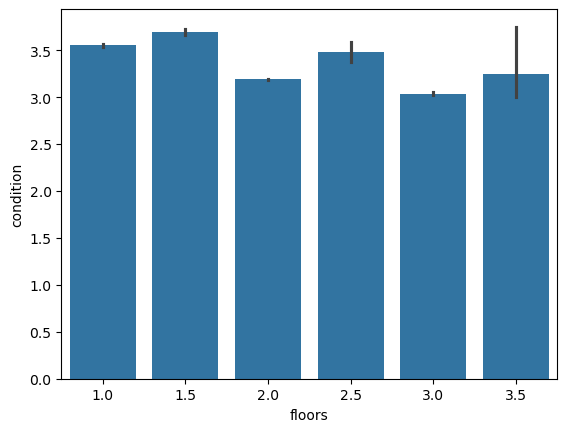

In [122]:
sns.barplot(x='floors',y='condition',data=data)
plt.show()

In [125]:
#zipcode,condition/grade:
data.groupby(['zipcode','condition']).size().reset_index().rename(columns={0:'Count'})

,zipcode,condition,Count
0,98001,2,5
1,98001,3,245
2,98001,4,97
3,98001,5,15
4,98002,3,74
...,...,...,...
278,98198,4,104
279,98198,5,12
280,98199,3,198
281,98199,4,77


# Scaling

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
std=StandardScaler()

In [133]:
for feature in data.columns:
    if data[feature].dtype==('int64' or 'float64'):
        reshaped=data[feature].values.reshape(-1,1)
        shaped_column=std.fit_transform(reshaped)
        data[feature]=shaped_column

In [136]:
data.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
17423,20150427T000000,565000.0,0.676485,2.0,-0.043444,-0.164801,2.0,-0.087173,0.999213,-0.629187,-0.558836,0.303850,-0.658681,-0.340627,-0.839937,47.6689,-122.195,0.836691,-0.164354
6025,20150416T000000,920000.0,0.676485,1.5,-0.250321,-0.277815,2.0,-0.087173,-0.305759,-0.629187,0.291916,-0.155048,-0.229365,-1.430073,0.636594,47.6376,-122.307,-0.024151,-0.335797
20747,20150412T000000,265000.0,-1.473959,1.5,-1.084362,-0.281992,2.0,-0.087173,-0.305759,-0.629187,-0.558836,-0.850640,-0.658681,0.170051,0.879568,47.7117,-122.326,-1.316873,-0.238740
17546,20141103T000000,337000.0,0.676485,2.5,1.219595,-0.225376,2.0,-0.087173,-0.305759,-0.629187,0.291916,1.704694,-0.658681,1.089271,-0.671724,47.3486,-122.153,1.493265,-0.256247
3429,20141008T000000,475000.0,-0.398737,1.5,-0.478975,-0.299061,1.5,-0.087173,-0.305759,-0.629187,0.291916,-0.179200,-0.658681,-1.430073,0.692665,47.6869,-122.317,-0.724497,-0.307413


# Spliting

In [137]:
from sklearn.model_selection import train_test_split

In [149]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('price',axis=1),data[['price']],test_size=0.2,random_state=1)

In [146]:
data.drop('date',axis=1,inplace=True)

# Model Selection:

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
linearRegression=LinearRegression()

In [150]:
linearRegression.fit(X_train,y_train)

LinearRegression()

In [151]:
y_pred_lr=linearRegression.predict(X_test)

Evaluation Metrics For Linear Regression:

In [154]:
from sklearn.metrics import mean_squared_error

In [155]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Mean Squared Error (MSE) of Linear Regression:', mse_lr)

Mean Squared Error (MSE) of Linear Regression: 54260367620.85276


In [156]:
from sklearn.metrics import r2_score

In [157]:
r2_lr = r2_score(y_test, y_pred_lr)
print('R-squared of Linear Regression:', r2_lr)

R-squared of Linear Regression: 0.6856311567367822


Ridge Regression:

In [158]:
from sklearn.linear_model import Ridge

In [159]:
ridge=Ridge()

In [160]:
ridge.fit(X_train,y_train)

Ridge()

In [161]:
y_pred_ridge=ridge.predict(X_test)

Evaluation for Ridge Regression

In [162]:
#MSE:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Mean Squared Error (MSE) of Linear Regression:', mse_ridge)

Mean Squared Error (MSE) of Linear Regression: 54242754678.805


In [164]:
#RSquare:
rse_ridge=r2_score(y_test,y_pred_ridge)
print('R2 of Linear Regression:', rse_ridge)

R2 of Linear Regression: 0.6857332010181021
